<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Simulate-NIRISS-spectra" data-toc-modified-id="Simulate-NIRISS-spectra-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Simulate NIRISS spectra</a></span></li><li><span><a href="#Simulate-GN-z11" data-toc-modified-id="Simulate-GN-z11-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simulate GN-z11</a></span></li><li><span><a href="#Redshift-fit" data-toc-modified-id="Redshift-fit-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Redshift fit</a></span></li><li><span><a href="#Generate-1D-model-spectra" data-toc-modified-id="Generate-1D-model-spectra-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Generate 1D model spectra</a></span></li><li><span><a href="#Match-to-HST-grism" data-toc-modified-id="Match-to-HST-grism-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Match to HST grism</a></span><ul class="toc-item"><li><span><a href="#Replace-thumbnail-&amp;-segmentation-stamp" data-toc-modified-id="Replace-thumbnail-&amp;-segmentation-stamp-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Replace thumbnail &amp; segmentation stamp</a></span></li></ul></li></ul></div>

# Simulate NIRISS spectra

Baseline simulation from MIRAGE with 

- F115W + F150W + F200W
- BOTH grisms
- 4 dithers
- NGROUPS=11
- Point source morphology

See https://github.com/gbrammer/grizli/blob/master/examples/mirage-niriss.ipynb.

NIRISS ``beams`` cutout file and NIRISS config files at https://s3.amazonaws.com/grizli-v1/Scratch/niriss-sim.tar.gz. 

Add config files to ``$GRIZLI/CONF/`` if you don't already have them.

In [1]:
import os
import glob
import yaml

import matplotlib.pyplot as plt
import numpy as np

import astropy.io.fits as pyfits

try:
    import jwst    
    # Path to pipeline config files
    JWST_PIPELINE = os.path.dirname(jwst.__file__) + '/pipeline/'
    print('JWST pipeline version: ', jwst.__version__)
except:
    print('`import jwst` failed.')
    
import grizli
import grizli.jwst
from grizli import utils, multifit
utils.set_warnings()
print('Grizli version: ', grizli.__version__)

# github.com/gbrammer/eazy-py
import eazy
if not os.path.exists('templates'):
    eazy.symlink_eazy_inputs()

print('Eazy version: ', eazy.__version__)

#import pandeia.engine as etc
#print('MIRAGE version: ', mirage.__version__)
#print('PANDEIA etc version: ', etc.__version__)

# os.chdir('/Users/gbrammer/Research/JWST/NIRISS-Simulation')

JWST pipeline version:  0.16.2

Couldn't `import tristars`.  Get it from https://github.com/gbrammer/tristars to enable improved blind astrometric matching with triangle asterisms.

Grizli version:  1.2dev1648
Eazy version:  0.3.0


In [2]:
mb = multifit.MultiBeam('../data/niriss-point-jhk_00031.beams.fits', fcontam=0, min_sens=1.e-4)

# save original uncertainty array
orig_nexp, orig_expt = mb.compute_exptime()
print('Original exposure time')
for _ in mb.compute_exptime():
    print(yaml.dump(_, indent=5, Dumper=yaml.SafeDumper))

for beam in mb.beams:
    beam.err_orig = beam.grism.data['ERR']*1    
    beam.grism.exptime_orig = beam.grism.exptime*1
    

load_master_fits: ../data/niriss-point-jhk_00031.beams.fits


1 NirissMirage_v1/jw00042001001_01101_00002_nis_elec.fits GR150R
2 NirissMirage_v1/jw00042001001_01101_00003_nis_elec.fits GR150R
3 NirissMirage_v1/jw00042001001_01101_00004_nis_elec.fits GR150R
4 NirissMirage_v1/jw00042001001_01101_00005_nis_elec.fits GR150R
5 NirissMirage_v1/jw00042001001_01101_00008_nis_elec.fits GR150C
6 NirissMirage_v1/jw00042001001_01101_00009_nis_elec.fits GR150C
7 NirissMirage_v1/jw00042001001_01101_00010_nis_elec.fits GR150C
8 NirissMirage_v1/jw00042001001_01101_00011_nis_elec.fits GR150C
9 NirissMirage_v1/jw00042001001_01101_00014_nis_elec.fits GR150R
10 NirissMirage_v1/jw00042001001_01101_00015_nis_elec.fits GR150R
11 NirissMirage_v1/jw00042001001_01101_00016_nis_elec.fits GR150R
12 NirissMirage_v1/jw00042001001_01101_00017_nis_elec.fits GR150R
13 NirissMirage_v1/jw00042001001_01101_00020_nis_elec.fits GR150C
14 NirissMirage_v1/jw00042001001_01101_00021_nis_elec.fits GR150C
15 NirissMirage_v1/jw00

In [3]:
# Show exptime (~1 hr each grism total)
for _ in mb.compute_exptime():
    print(yaml.dump(_, indent=5, Dumper=yaml.SafeDumper))

# Grisms and PAs
print('# PA\n======')
print(yaml.dump(mb.PA, indent=5, Dumper=yaml.SafeDumper))

F115W: 8
F150W: 8
F200W: 8

F115W: 3435.766400000001
F150W: 3435.766400000001
F200W: 3435.766400000001

# PA
F115W:
     90.0:
     - 4
     - 5
     - 6
     - 7
     181.0:
     - 0
     - 1
     - 2
     - 3
F150W:
     90.0:
     - 12
     - 13
     - 14
     - 15
     181.0:
     - 8
     - 9
     - 10
     - 11
F200W:
     90.0:
     - 20
     - 21
     - 22
     - 23
     181.0:
     - 16
     - 17
     - 18
     - 19



In [4]:
ls /Users/Vince.ec/eazy-photoz/templates/EAZY_v1.0/

eazy_v1.0_sed1.dat  eazy_v1.0_sed3.dat  eazy_v1.0_sed5.dat
eazy_v1.0_sed2.dat  eazy_v1.0_sed4.dat  eazy_v1.0_sed6.dat


(6500.0, 6750.0)

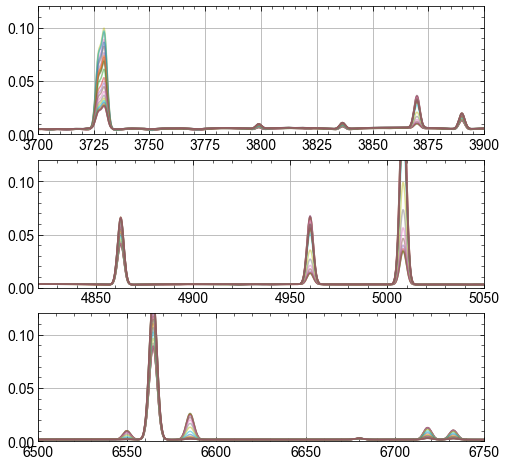

In [5]:
# Load the eazy filter file for renormalization
res = eazy.filters.FilterFile('FILTER.RES.latest')

# Read an eazy template to use as a model
# This one is a CSF model @ 30 Myr with redshift-dependent gas_logz and gas_logu
templ = eazy.templates.Template(file='/Users/Vince.ec/python_git_downloads/eazy-photoz/templates/spline_templates_v2/spline_age0.03_av0.0.fits')

fig, axes = plt.subplots(3,1,figsize=(8, 8), sharey=True)
for z in templ.template_redshifts:
    for ax in axes:
        ax.plot(templ.wave, templ.flux[templ.zindex(z),:], label=f'{z:.1f}', alpha=0.5)

for ax in axes:
    #ax.semilogx()
    ax.grid()
    ax.set_ylim(0, 0.12)
    
axes[0].set_xlim(3700, 3900)
axes[1].set_xlim(4820, 5050)
axes[2].set_xlim(6500, 6750)
    

In [6]:
def renorm_mag(abmag, templ, filter, **kwargs):
    target_fnu = 10**(-0.4*(abmag-23.9))*1.e-29
    templ_fnu = templ.integrate_filter(filter, **kwargs)
    return target_fnu / templ_fnu

# Simulate GN-z11

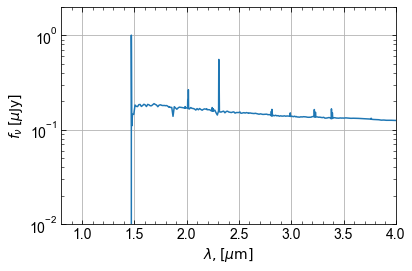

In [7]:
# GNz11
z = 11.1
norm_f160w = renorm_mag(26.1, templ, res[205], include_igm=True, z=z)

flux_ujy = templ.flux_fnu[templ.zindex(z)]*templ.igm_absorption(z)*norm_f160w/1.e-29

wave_obs = templ.wave*(1+z)
flux_flam = flux_ujy*1.e-29*3.e18/wave_obs**2

plt.plot(templ.wave*(1+z)/1.e4, flux_ujy)
plt.xlim(0.8, 4)
plt.semilogy()
plt.ylim(0.01, 2)
plt.xlabel(r'$\lambda,[\mu\mathrm{m}]$')
plt.ylabel(r'$f_\nu\,[\mu\mathrm{Jy}]$')
plt.grid()


In [8]:
np.random.seed(None)

In [9]:
# Compute grism model and replace data
def update_model(mb, wave, flam, target_exptime=None, reset=False, random_seed=None, **kwargs):
    """
    Update the science extension of the 2D beams based on a new 1D model
    """
    mb.compute_model(spectrum_1d=(wave, flam), is_cgs=True)
    
    if target_exptime is not None:
        for gr in mb.PA:
            expt_scale = target_exptime / orig_expt[gr]
            for pa in mb.PA[gr]:
                for _b in mb.PA[gr][pa]:
                    mb.beams[_b].grism.exptime = mb.beams[_b].grism.exptime_orig * expt_scale
                    mb.beams[_b].grism.header['EXPTIME'] = mb.beams[_b].grism.exptime
                    mb.beams[_b].grism.data['ERR'] = mb.beams[_b].err_orig/np.sqrt(expt_scale)
    elif reset:
        for gr in mb.PA:
            expt_scale = 1.
            for pa in mb.PA[gr]:
                for _b in mb.PA[gr][pa]:
                    mb.beams[_b].grism.exptime = mb.beams[_b].grism.exptime_orig * expt_scale
                    mb.beams[_b].grism.header['EXPTIME'] = mb.beams[_b].grism.exptime
                    mb.beams[_b].grism.data['ERR'] = mb.beams[_b].err_orig/np.sqrt(expt_scale)
        
    
    np.random.seed(random_seed)
    for beam in mb.beams:

        # No bad pixels
        msk = (beam.grism.data['ERR'] == 0) | (beam.grism.data['DQ'] > 0)
        beam.grism.data['ERR'][msk] = np.median(beam.grism.data['ERR'][~msk])
        beam.grism.data['DQ'][msk] = 0

        noise = np.random.normal(size=beam.sh)*beam.grism['ERR']
        beam.grism.data['SCI'] = (beam.beam.model + beam.contam + noise).astype(np.float32)
        #print(scale_frac, scale_noise)
        beam._parse_from_data(**beam._parse_params)

    mb._parse_beam_arrays()
    mb._parse_beams(psf=False)
    mb.initialize_masked_arrays()



/Users/Vince.ec/miniconda3/envs/astroconda3.6/lib/python3.6/site-packages/grizli-1.2.dev1648-py3.6-macosx-10.9-x86_64.egg/grizli/fitting.py:3293: MatplotlibDeprecationWarning: The 'subsx' parameter of __init__() has been renamed 'subs' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axc.semilogx(subsx=[wmax])


(-0.1, 0.3)

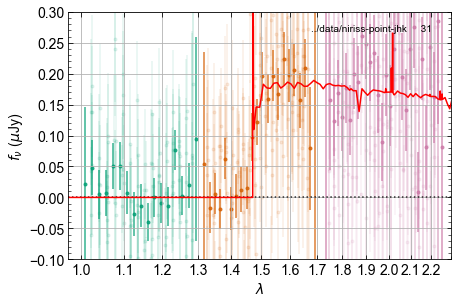

In [10]:
random_seed = 1 # To make reproducible
random_seed = None

update_model(mb, wave_obs, flux_flam, random_seed=random_seed)

_fig = mb.oned_figure(units='ujy', bin=4)
ax = _fig.axes[0]
ax.plot(wave_obs/1.e4, flux_ujy, color='r')
ax.set_ylim(-0.1, 0.3)

/Users/Vince.ec/miniconda3/envs/astroconda3.6/lib/python3.6/site-packages/grizli-1.2.dev1648-py3.6-macosx-10.9-x86_64.egg/grizli/fitting.py:3293: MatplotlibDeprecationWarning: The 'subsx' parameter of __init__() has been renamed 'subs' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axc.semilogx(subsx=[wmax])
/Users/Vince.ec/miniconda3/envs/astroconda3.6/lib/python3.6/site-packages/grizli-1.2.dev1648-py3.6-macosx-10.9-x86_64.egg/grizli/fitting.py:3293: MatplotlibDeprecationWarning: The 'subsx' parameter of __init__() has been renamed 'subs' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axc.semilogx(subsx=[wmax])
/Users/Vince.ec/miniconda3/envs/astroconda3.6/lib/python3.6/site-packages/grizli-1.2.dev1648-py3.6-macosx-10.9-x86_64.egg/grizli/fitting.py:3293: MatplotlibDeprecationWarning: The 'subsx' parameter of __init__() has been renamed 'subs' since Matplotlib 3.3; support for the old name will be d

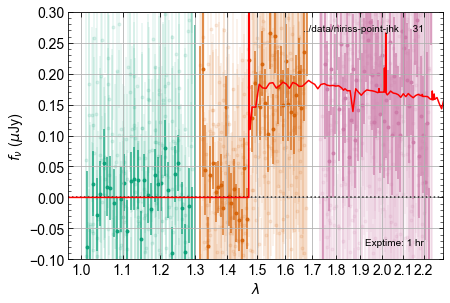

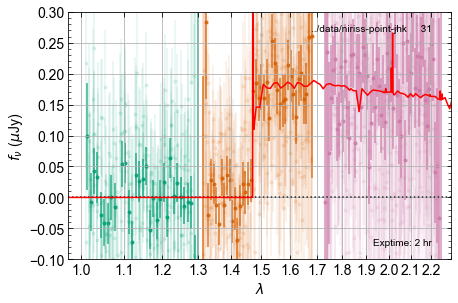

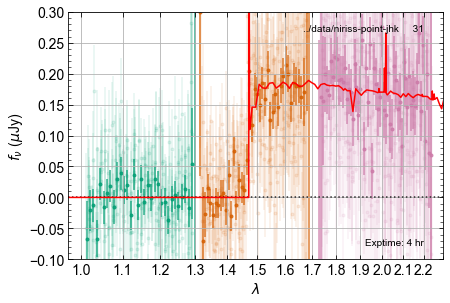

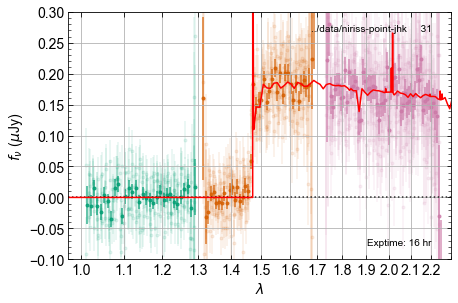

In [11]:
# Deeper
for time_hrs in [1,2,4,16]:
    update_model(mb, wave_obs, flux_flam, target_exptime=time_hrs*3600, random_seed=random_seed)

    _fig = mb.oned_figure(units='ujy', bin=2)
    ax = _fig.axes[0]
    ax.plot(wave_obs/1.e4, flux_ujy, color='r')
    ax.set_ylim(-0.1, 0.3)
    ax.text(0.95, 0.05, f'Exptime: {time_hrs} hr', ha='right', va='bottom', transform=ax.transAxes)

In [12]:
# Reset exptime
update_model(mb, wave_obs, flux_flam, target_exptime=None, reset=True, random_seed=random_seed)

# Redshift fit

In [13]:
# Have to write the beams.fits file for the fitting script
mb.group_name = 'niriss-gnz11'
mb.write_master_fits()

niriss-gnz11_00031.beams.fits


In [28]:
from grizli.pipeline import auto_script
# if not os.path.exists('../data/multifit_data/fit_args.npy'):
args = auto_script.generate_fit_params(field_root='niriss-gnz11', min_sens=1.e-4, sys_err=0.03, 
                                include_photometry=False, fcontam=0.1)
    
print('Default fitting parameters in `fit_args.npy`.')

Saved arguments to fit_args.npy.
Default fitting parameters in `fit_args.npy`.


Run id=31 with fit_args.npy
load_master_fits: niriss-gnz11_00031.beams.fits
1 NirissMirage_v1/jw00042001001_01101_00002_nis_elec.fits GR150R
2 NirissMirage_v1/jw00042001001_01101_00003_nis_elec.fits GR150R
3 NirissMirage_v1/jw00042001001_01101_00004_nis_elec.fits GR150R
4 NirissMirage_v1/jw00042001001_01101_00005_nis_elec.fits GR150R
5 NirissMirage_v1/jw00042001001_01101_00008_nis_elec.fits GR150C
6 NirissMirage_v1/jw00042001001_01101_00009_nis_elec.fits GR150C
7 NirissMirage_v1/jw00042001001_01101_00010_nis_elec.fits GR150C
8 NirissMirage_v1/jw00042001001_01101_00011_nis_elec.fits GR150C
9 NirissMirage_v1/jw00042001001_01101_00014_nis_elec.fits GR150R
10 NirissMirage_v1/jw00042001001_01101_00015_nis_elec.fits GR150R
11 NirissMirage_v1/jw00042001001_01101_00016_nis_elec.fits GR150R
12 NirissMirage_v1/jw00042001001_01101_00017_nis_elec.fits GR150R
13 NirissMirage_v1/jw00042001001_01101_00020_nis_elec.fits GR150C
14 NirissMirage_v1/jw00042001001_01101_00021_nis_elec.fits GR150C
15 Niriss

(31, 1, 30.741245985031128)

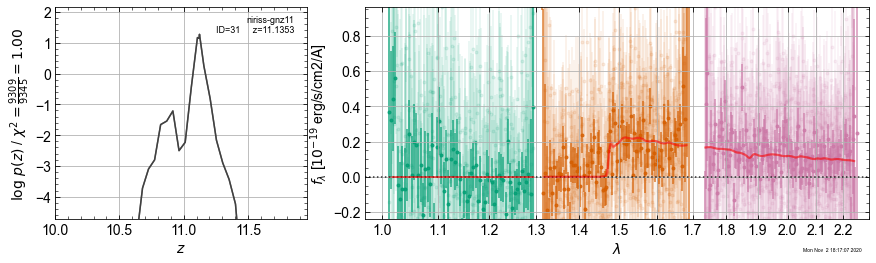

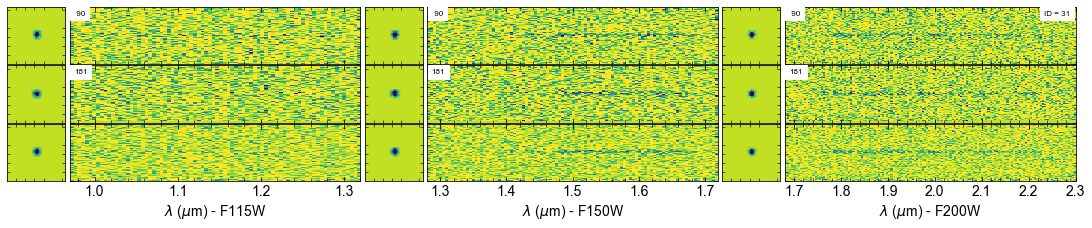

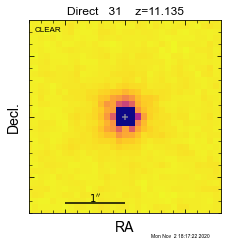

In [22]:
from grizli import fitting

# Fit the redshift with the same input template
t0 = {'blue':utils.SpectrumTemplate(wave=templ.wave, flux=templ.flux[templ.zindex(z),:], name='blue')}

fitting.run_all_parallel(31, group_name='niriss-gnz11', t0=t0, t1=t0, verbose=True, zr=[10, 12])

# Generate 1D model spectra

Fold 1D spectrum through grism model for given input template

In [16]:
def make_oned_spec(mb, wave, flam, **kwargs):
    """
    Extract 1D spectrum based on an input model template
    
    kwargs can be, e.g., 
    
        bin = binning factor
        target_exptime = new exposure time per grism, seconds
        
    """
    import astropy.units as u
    
    update_model(mb, wave, flam, **kwargs)
    
    spec = mb.optimal_extract(data=mb.scif_mask, **kwargs)
    spec_flat = mb.optimal_extract(data=mb.flat_flam[mb.fit_mask], **kwargs)
    
    for k in spec:
        spec[k]['flam'] = spec[k]['flux']/spec_flat[k]['flux']
        spec[k]['eflam'] = spec[k]['err']/spec_flat[k]['flux']
        spec[k]['flam'].unit = u.erg/u.second/u.cm**2/u.Angstrom
        spec[k]['eflam'].unit = spec[k]['flam'].unit
        
    return spec
    

(-1e-20, 4e-20)

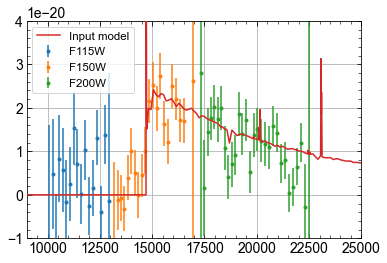

In [23]:
spec = make_oned_spec(mb, wave_obs, flux_flam, bin=4)
for gr in spec:
    plt.errorbar(spec[gr]['wave'], spec[gr]['flam'], spec[gr]['eflam'], 
                 linestyle='None', marker='.', label=gr)

plt.plot(wave_obs, flux_flam, zorder=10, label='Input model')
plt.grid()
plt.legend()
plt.xlim(9000, 2.5e4)
plt.ylim(-0.1e-19, 4.e-20)

In [24]:
%timeit spec = make_oned_spec(mb, wave_obs, flux_flam, bin=1)

310 ms ± 41.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Match to HST grism

Download 3D-HST grism product nd generate a NIRISS model from the best-fit to WFC3

In [41]:
import astropy.io.fits as pyfits


#obj = 'gds-grism-j033236m2748_25250' # Ha + OIII
#obj = 'gds-grism-j033236m2748_06168' # Red Ha emitter
#obj = 'gds-grism-j033236m2748_09150' # Massive
obj = 'gds-grism-j033236m2748_33593' # Massive

root = '_'.join(obj.split('_')[:-1])

for ext in ['full.fits','full.png','beams.fits']:
    url = f'https://s3.amazonaws.com/grizli-v1/Pipeline/{root}/Extractions/{obj}.{ext}'
    print(f'{obj}.{ext}')
    if not os.path.exists(f'{obj}.{ext}'):
        os.system(f'wget "{url}"')

print(obj)
full = pyfits.open(f'{obj}.full.fits')
#full.info()

mbx = multifit.MultiBeam(f'{obj}.beams.fits', fcontam=0.2, min_sens=1.e-3)
z = full[0].header['REDSHIFT']


gds-grism-j033236m2748_33593.full.fits
gds-grism-j033236m2748_33593.full.png
gds-grism-j033236m2748_33593.beams.fits
gds-grism-j033236m2748_33593
load_master_fits: gds-grism-j033236m2748_33593.beams.fits
1 ibhj07ygq_flt.fits G141
2 ibhj07ynq_flt.fits G141
3 ibhj07yuq_flt.fits G141
4 ibhj07z1q_flt.fits G141
5 ibhj31giq_flt.fits G141
6 ibhj31grq_flt.fits G141
7 ibhj31h3q_flt.fits G141
8 ibhj31hcq_flt.fits G141


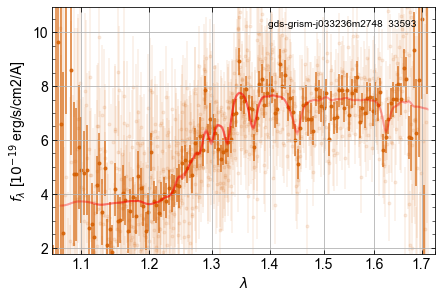

In [42]:
xtfit = mbx.template_at_z(z, templates=args['t0'])
xtfit1 = mbx.template_at_z(z, templates=args['t1'])
_ = mbx.oned_figure(tfit=xtfit)

## Replace thumbnail & segmentation stamp

Just insert the WFC3 image directly without accounting for the NIRISS PSF

In [43]:

# Recenter
for ext in ['DSCI']:
    full[ext].header['CRVAL1'] = mb.ra
    full[ext].header['CRVAL2'] = mb.dec

# WCS in seg
for k in full['DSCI'].header:
    if k.startswith('C'):
        full['SEG'].header[k] = full['DSCI'].header[k]
    

full['SEG'].data[full['SEG'].data == full[0].header['ID']] = mb.id

mb.replace_segmentation_image_cutouts(full['SEG'])
mb.replace_direct_image_cutouts(full['DSCI'])

templ = xtfit['line1d']
wave = templ.wave
flam = templ.flux

Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinat

(-3.053794236443733, 12.21517694577493)

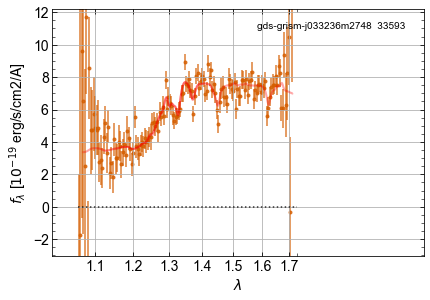

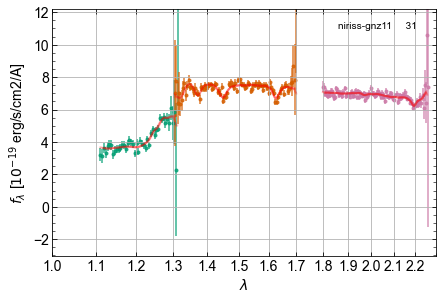

In [45]:
spec = make_oned_spec(mb, wave, flam, bin=4)

_wf3 = mbx.oned_figure(tfit=xtfit1, show_beams=False)
ax = _wf3.axes[0]
ax.set_xlim(1.0, 2.3)

tfit = mb.template_at_z(z, templates=args['t1'])
_nis = mb.oned_figure(tfit=tfit, show_beams=False)
_nis.axes[0].set_xlim(1.0, 2.3)
_nis.axes[0].set_ylim(*ax.get_ylim())


WFC3
NIRISS
Drizzle line -> SII  (5.42 0.40)
Drizzle line -> Ha   (27.76 0.39)
Drizzle line -> OIII (33.14 0.55)
Drizzle line -> Hb   (5.71 0.62)


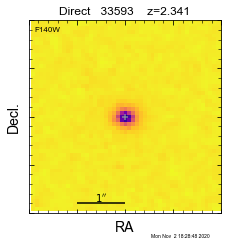

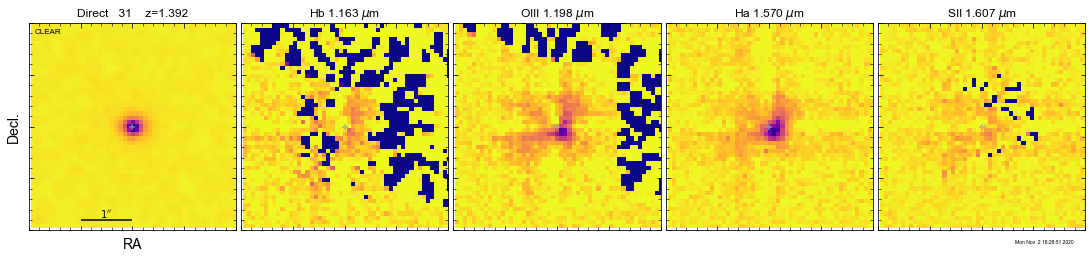

In [44]:
print('WFC3')
pline = {'kernel': 'square', 'pixfrac': 0.2, 'pixscale': 0.08, 'size': 4, 'wcs': None}
line_hdu = mbx.drizzle_fit_lines(xtfit1, pline, force_line=['Ha','SII'], save_fits=False, get_ir_psfs=False)

s = 1
kws = dict(size_arcsec=2, scale=s, dscale=s/3, cmap='plasma_r')

_fig = fitting.show_drizzled_lines(line_hdu, direct_filter=['F115W'], **kws)

print('NIRISS')
line_hdu = mb.drizzle_fit_lines(tfit, pline, save_fits=False, get_ir_psfs=False)

s = 1
_fig = fitting.show_drizzled_lines(line_hdu, direct_filter=['F150W'], **kws)


#hdu = mb.drizzle_fit_lines(tfit, args['pline'], force_line=['Ha'], save_fits=False)

In [ ]:
0.02

In [5]:
1/60/60

0.0002777777777777778